# Preprocessing and clustering genes

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import igraph as ig
import leidenalg

In [2]:
# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/home/ajararweh/miniconda3/envs/deepV_a100/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ajararweh/miniconda3/envs/deepV_a100/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ajararweh/miniconda3/envs/deepV_a100/lib/python3

scanpy==1.9.5 anndata==0.9.2 umap==0.5.3 numpy==1.24.4 scipy==1.11.1 pandas==2.0.3 scikit-learn==1.3.0 statsmodels==0.14.0 igraph==0.9.10 pynndescent==0.5.10


/home/ajararweh/miniconda3/envs/deepV_a100/lib/python3.10/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [3]:
results_file = 'genellm_funmi.h5ad'  # the file that will store the analysis results

In [5]:
adata = sc.read_text("data/gene_embeds.tsv", delimiter='\t', first_column_names=1, dtype='float32').transpose()

In [8]:
adata.to_df()

,FES,HADHA,SLC7A7,LCK,HSPA2,ZSCAN9,SEPTIN3,SPATA16,JCAD,TBC1D25,...,BHLHE22,RALBP1,OR4D6,TBX20,C19orf25,IQCJ-SCHIP1,BPY2C,DNER,SOX7,CXCL14
V2,-0.341311,-0.351201,-0.369487,-0.251299,-0.535696,-0.400928,-0.289331,-0.313472,-0.249352,-0.209029,...,-0.424366,-0.244760,-0.272089,-0.327529,-0.237248,-0.354423,-0.234241,-0.070108,-0.414546,-0.476445
V3,0.205672,0.225081,0.170297,0.120406,0.271150,0.174326,0.114516,0.113555,0.082154,0.085865,...,0.220063,0.132222,0.121786,0.080336,0.044104,0.242978,0.074157,-0.080057,0.102858,0.187507
V4,0.996406,0.998186,0.996952,0.994520,0.999176,0.996438,0.995023,0.995614,0.991867,0.993096,...,0.998277,0.992811,0.992504,0.997790,0.988642,0.997135,0.991032,0.969200,0.997626,0.998178
V5,-0.918790,-0.944061,-0.911570,-0.886551,-0.963694,-0.917020,-0.900162,-0.901933,-0.885131,-0.889613,...,-0.938459,-0.906140,-0.897309,-0.949471,-0.847078,-0.920542,-0.889028,-0.801993,-0.939434,-0.951764
V6,0.681052,0.784274,0.675569,0.639147,0.854405,0.820004,0.639758,0.762564,0.716497,0.762803,...,0.877845,0.619730,0.574295,0.800349,0.665811,0.864402,0.726223,0.455706,0.763043,0.801940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V765,-0.599970,-0.496959,-0.350948,-0.616457,-0.242910,-0.553629,-0.492237,-0.551361,-0.685202,-0.560483,...,-0.448252,-0.675891,-0.622657,-0.555628,-0.674922,-0.507562,-0.691865,-0.786514,-0.502216,-0.334676
V766,0.083081,0.092874,0.119445,0.091086,0.043681,0.079025,0.154552,0.052673,0.022893,0.045937,...,0.027672,0.114010,0.103758,0.044752,0.044638,0.040632,0.091830,0.185105,0.054700,0.083012
V767,0.999041,0.999494,0.999004,0.998523,0.999720,0.998844,0.998707,0.998784,0.997802,0.997856,...,0.999337,0.998223,0.998219,0.999496,0.996924,0.998826,0.997748,0.992779,0.999414,0.999504
V768,-0.751752,-0.672750,-0.593623,-0.761980,-0.470973,-0.833950,-0.743724,-0.775804,-0.882044,-0.857105,...,-0.714846,-0.870417,-0.817062,-0.817308,-0.809846,-0.730208,-0.890027,-0.936035,-0.719837,-0.541050


In [9]:
adata.var_names_make_unique() 

Identify highly-variable genes.

In [10]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


Scale each gene to unit variance.

In [11]:
sc.pp.scale(adata, max_value=10)

Reduce the dimensionality of the data by running principal component analysis (PCA), which reveals the main axes of variation and denoises the data.

In [12]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


In [13]:
adata.write(results_file)

In [14]:
adata

AnnData object with n_obs × n_vars = 768 × 15778
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

## Computing the neighborhood graph

Let us compute the neighborhood graph of cells using the PCA representation of the data matrix. You might simply use default values here. For the sake of reproducing Seurat's results, let's take the following values.

In [15]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


## Embedding the neighborhood graph

In [16]:
sc.tl.umap(adata)
sc.tl.tsne(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)
computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:01)


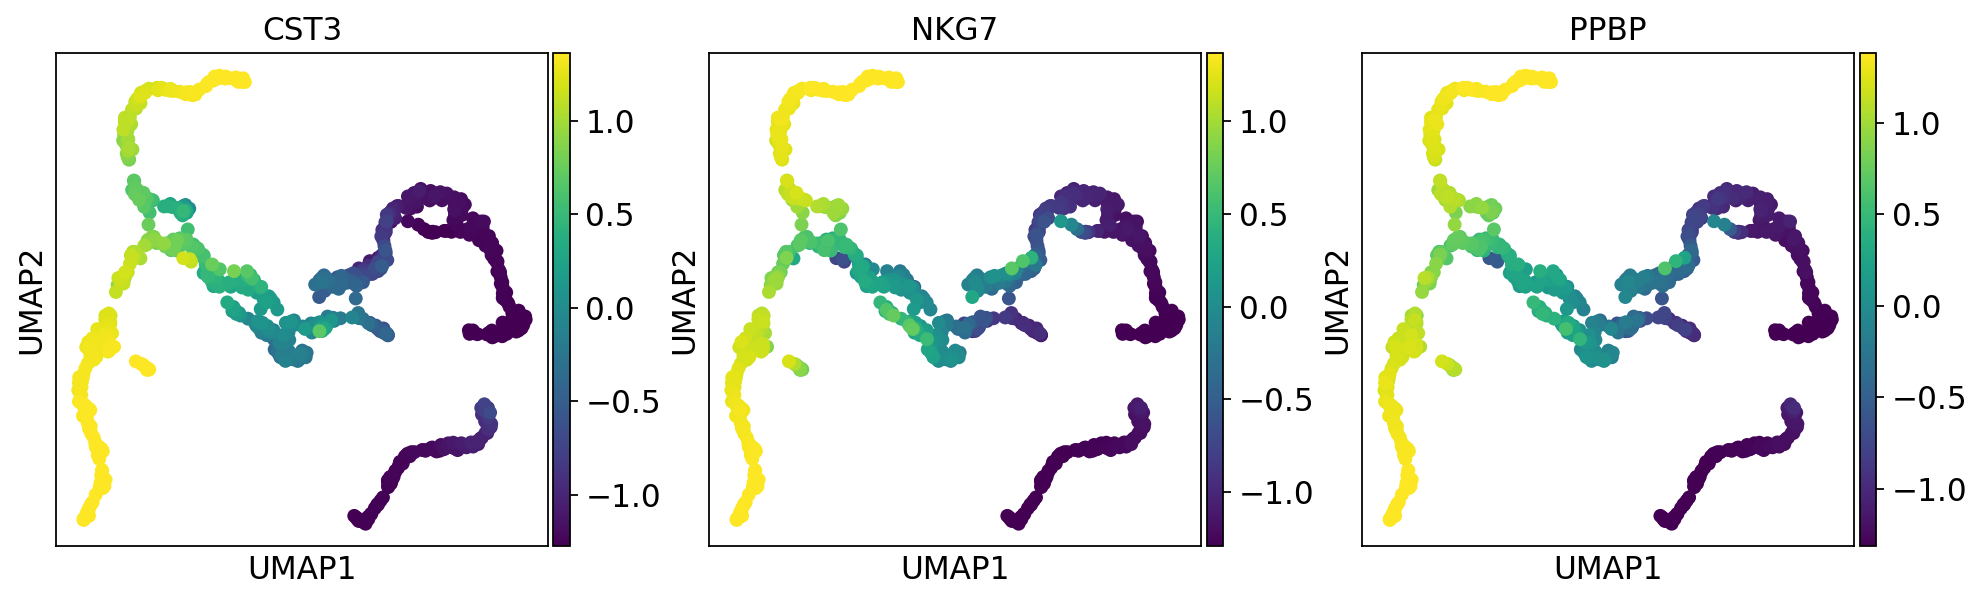

In [17]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP']) #normalized, logarithmized, but uncorrected gene expression

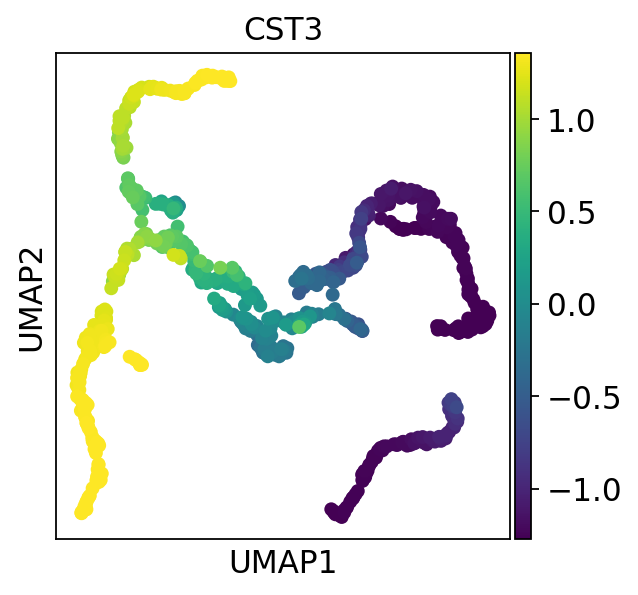

In [18]:
sc.pl.umap(adata, color=['CST3'], use_raw=False)##normalized, logarithmized, scaled gene expression

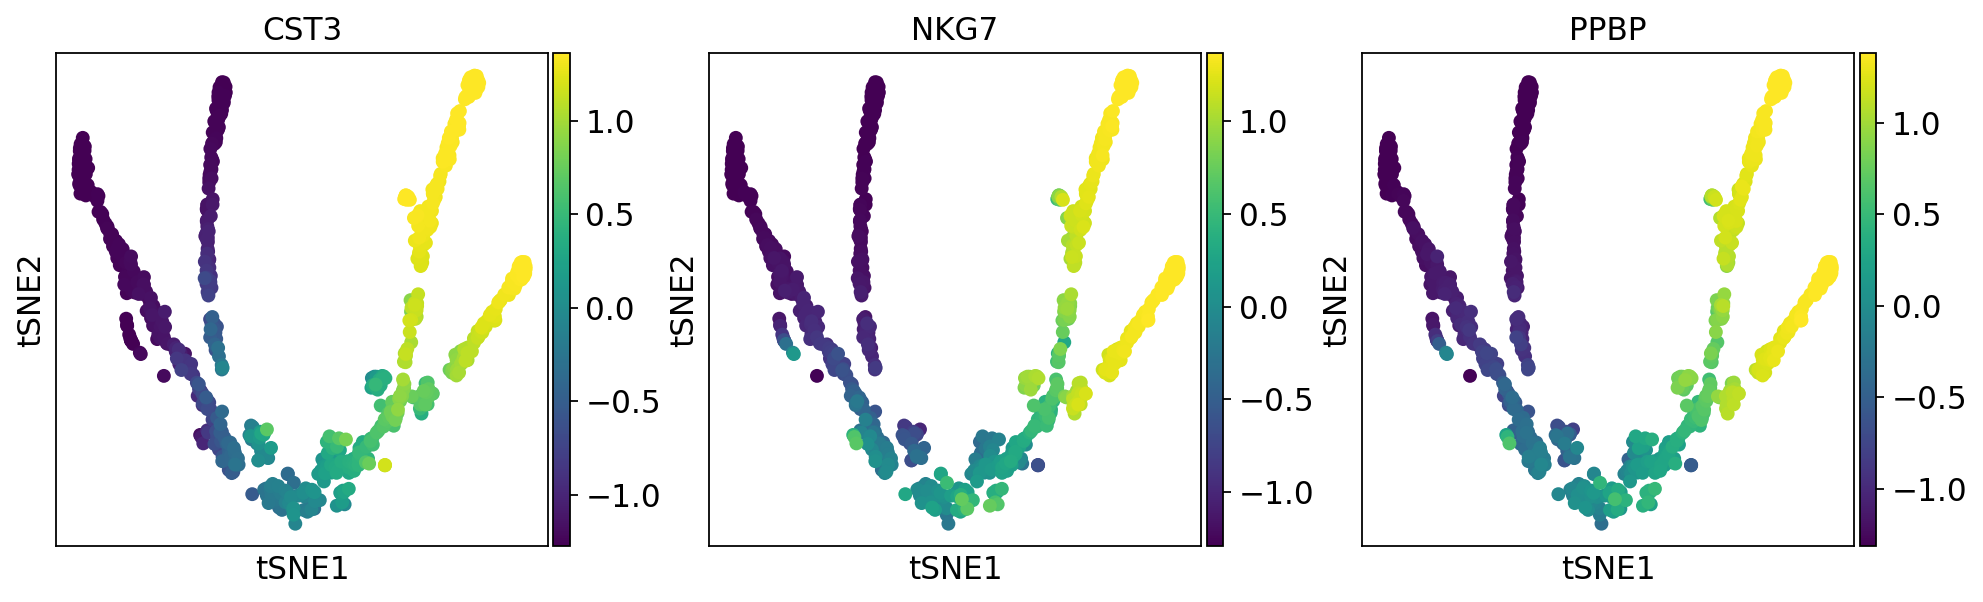

In [19]:
sc.pl.tsne(adata, color=['CST3', 'NKG7', 'PPBP'])

## Clustering the neighborhood graph

In [20]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 23 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


Plot the clusters, which agree quite well with the result of Seurat.

/home/ajararweh/miniconda3/envs/deepV_a100/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


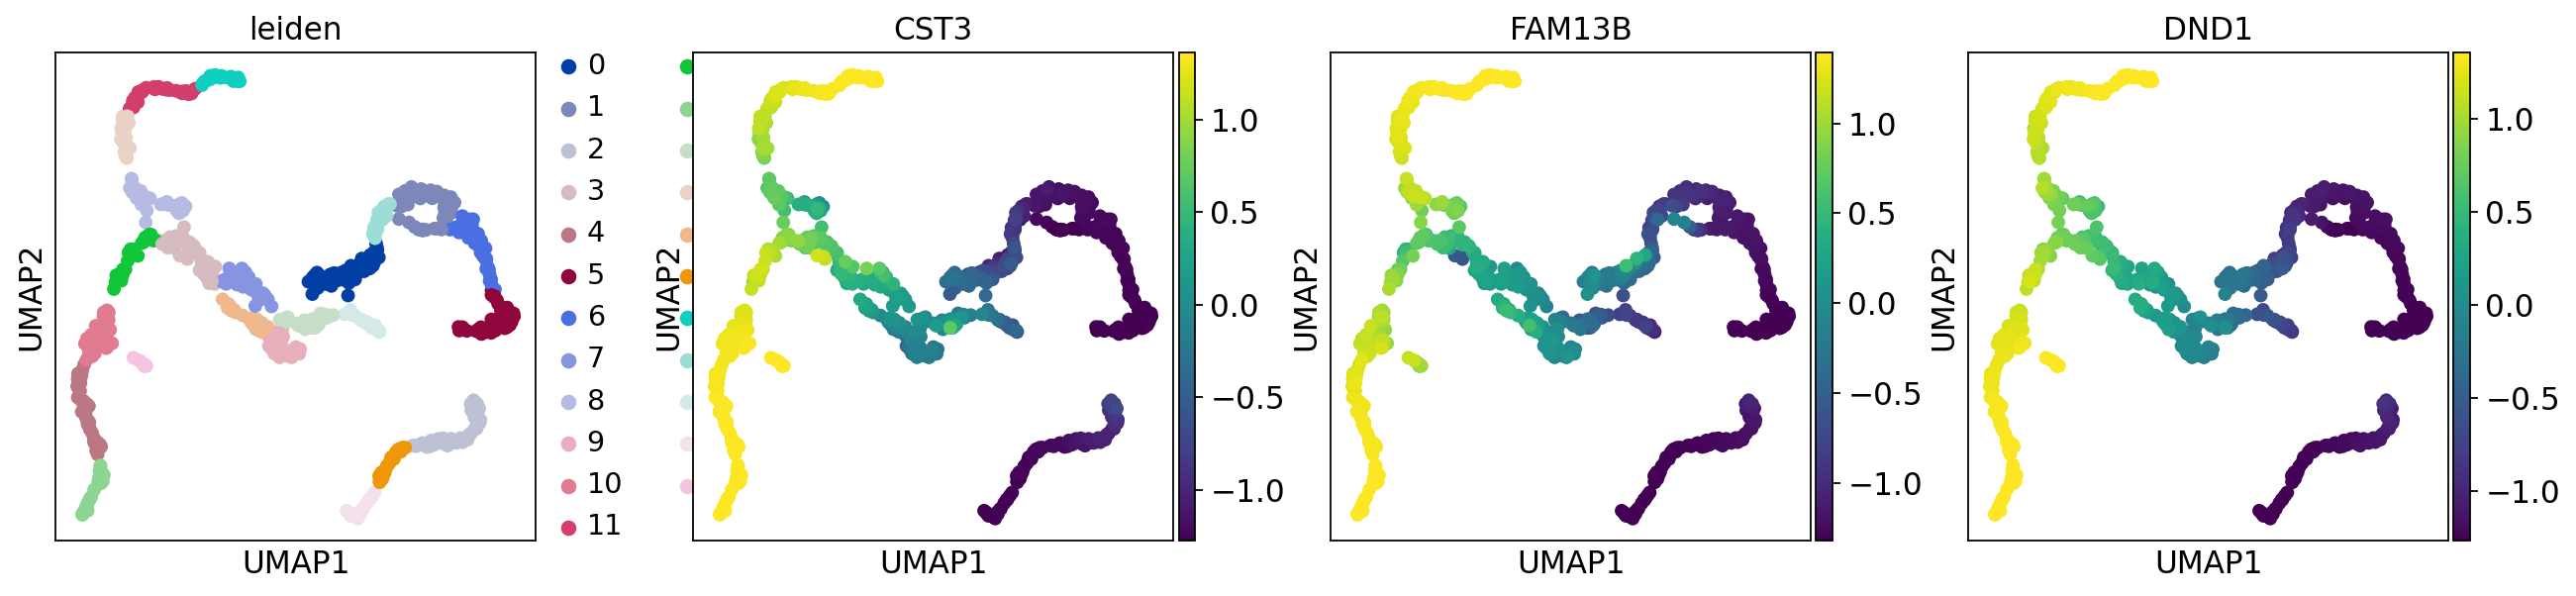

In [21]:
sc.pl.umap(adata, color=['leiden', 'CST3', 'FAM13B', 'DND1'])

Save the result.

In [33]:
adata.write(results_file)

In [24]:
len(new_cluster_names), len(set(new_cluster_names))

(14, 13)

In [30]:
adata.strings_to_categoricals

<bound method AnnData.strings_to_categoricals of AnnData object with n_obs × n_vars = 768 × 15778
    obs: 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'tsne', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'>

In [29]:
new_cluster_names = [
    "Metabotropic glutamate/pheromone receptors",
    "rRNA modification",
    "Signaling by Interleukins",
    "DNA Repair",
    "4",
    "Translation",
    "Keratan sulfate degradation",
    "7",
    "9",
    "10",
    "Keratinization",
    "12",
    "G alpha(s) signalling events"]

adata.rename_categories('leiden', new_cluster_names)

ValueError: new categories need to have the same number of items as the old categories!

/home/ajararweh/miniconda3/envs/deepV_a100/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


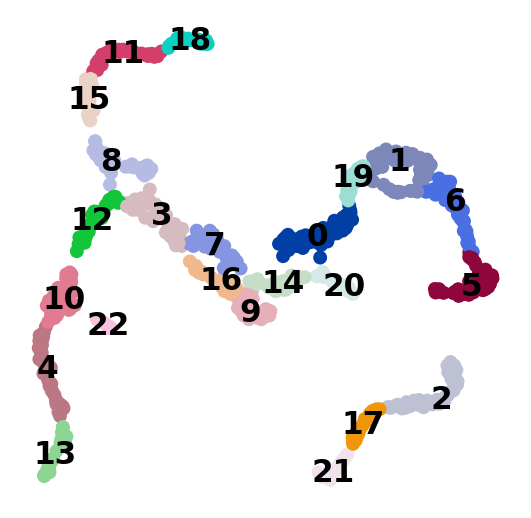

In [31]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

In [32]:
adata

AnnData object with n_obs × n_vars = 768 × 15778
    obs: 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'tsne', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [53]:
# `compression='gzip'` saves disk space, but slows down writing and subsequent reading
adata.write(results_file, compression='gzip')  

If you want to export to "csv", you have the following options:

In [55]:
# Export single fields of the annotation of observations
# adata.obs[['n_counts', 'louvain_groups']].to_csv(
#     './write/pbmc3k_corrected_louvain_groups.csv')

# Export single columns of the multidimensional annotation
# adata.obsm.to_df()[['X_pca1', 'X_pca2']].to_csv(
#     './write/pbmc3k_corrected_X_pca.csv')

# Or export everything except the data using `.write_csvs`.
# Set `skip_data=False` if you also want to export the data.
# adata.write_csvs(results_file[:-5], )